MACHINE EXERCISE NO. 1 Linear Regression

    Joshua Dela Cruz
    2023-02911



## General Resources

### Libraries

In [1]:
# Data importation and manipulation
import os 
import pandas as pd
import numpy as np

# Model creation, calculation and test
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Data visualization and exploratory analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Partitioning
from sklearn.model_selection import train_test_split


In [2]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

### References

     - Problem 1 data source and description: https://archive.ics.uci.edu/dataset/242/energy+efficiency
     - Problem 2 data source and description: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Problem 1: Energy Efficiency in Buildings

    This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

    We perform energy analysis using 12 different building shapes simulated in Ecotect. 
    The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. 
    The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

### Dataset

#### Import

In [3]:
def import_excel_dataset(file_path):
    df = pd.read_excel(file_path)
    return df

In [4]:
energy_efficiency_dataset = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\01 Regression\ENB2012_data.xlsx"
energy_efficiency_df = import_excel_dataset(energy_efficiency_dataset)

In [5]:
energy_efficiency_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


    The dataset contains 768 samples of simulated buildings with 8 attributes (X1 to X8) and two targets (Y1 and Y2). 
    The following are their meanings:
        X1 Relative Compactness
        X2 Surface Area
        X3 Wall Area
        X4 Roof Area
        X5 Overall Height
        X6 Orientation
        X7 Glazing Area
        X8 Glazing Area Distribution
        Y1 Heating Load
        Y2 Cooling Load

#### Exploratory Analysis

In [6]:
energy_efficiency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


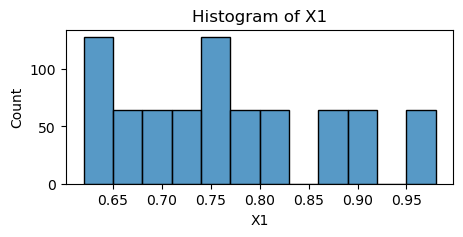

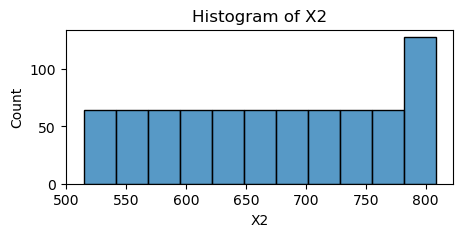

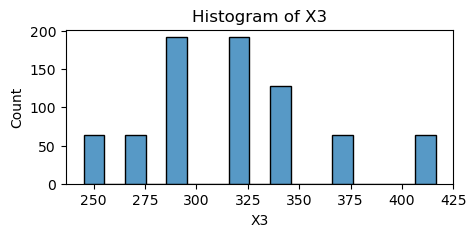

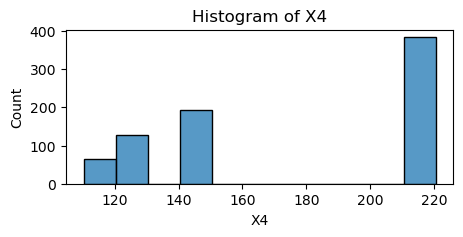

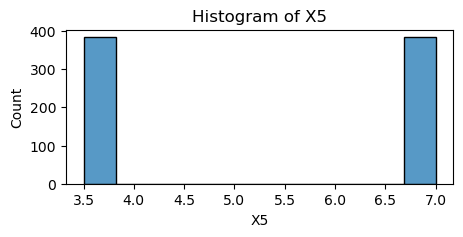

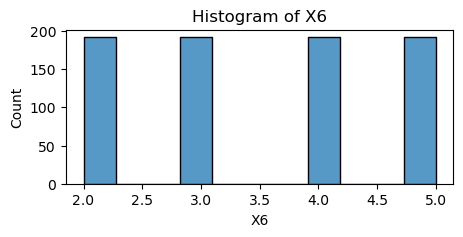

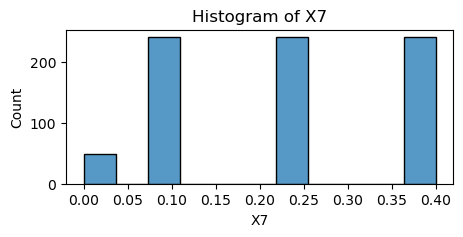

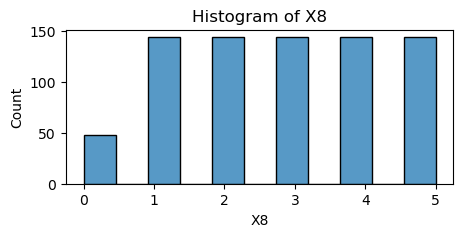

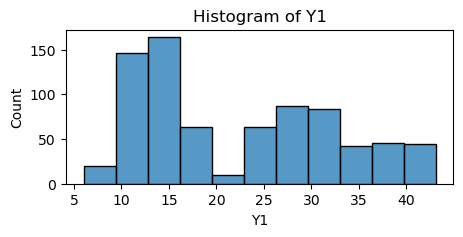

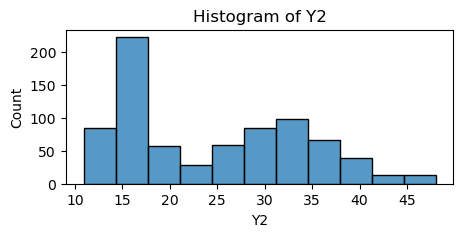

In [7]:
for column in energy_efficiency_df.columns:
    if energy_efficiency_df[column].dtype != 'object':
        plt.figure(figsize=(5, 2))
        sns.histplot(x=column, data=energy_efficiency_df)
        plt.title(f"Histogram of {column}")
        plt.show()

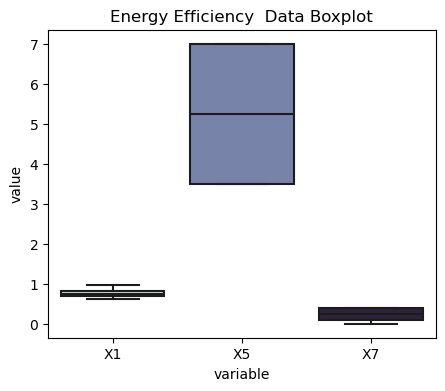

In [8]:
df_X1_X5_X7 = energy_efficiency_df.drop(columns=['X2','X3','X4','X6','X8','Y1','Y2'])

# Collect all features 
df_melted = df_X1_X5_X7.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(5, 4))
sns.boxplot(x='variable', y='value', data=df_melted, palette = 'ch:s=.25,rot=-.25')
plt.title('Energy Efficiency  Data Boxplot')
plt.show()

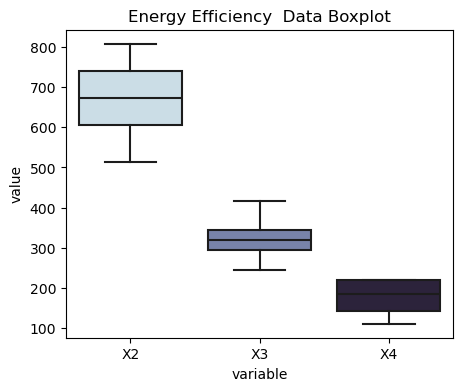

In [9]:
df_X2_X3_X4 = energy_efficiency_df.drop(columns=['X1','X5','X6','X7','X8','Y1','Y2'])

# Collect all features 
df_melted = df_X2_X3_X4.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(5, 4))
sns.boxplot(x='variable', y='value', data=df_melted, palette = 'ch:s=.25,rot=-.25')
plt.title('Energy Efficiency  Data Boxplot')
plt.show()

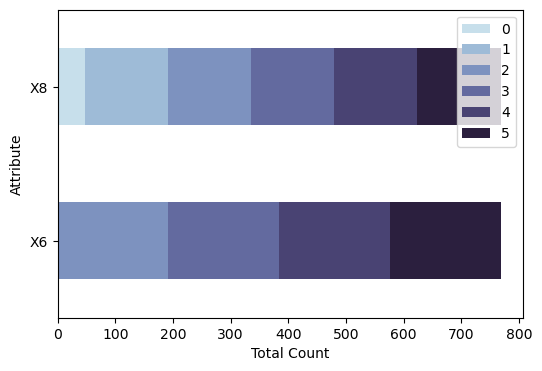

In [10]:
df_X6_X8 = energy_efficiency_df.drop(columns=['X1','X2','X3','X4','X5','X7','Y1','Y2'])

# Count total for each attribute
count_df = df_X6_X8.apply(pd.Series.value_counts)

# Create a stacked bar graph
palette = sns.color_palette("ch:s=.25,rot=-.25", len(count_df))
ax = count_df.T.plot.barh(stacked=True, figsize=(6, 4), color = palette)
ax.set_xlabel("Total Count")
ax.set_ylabel("Attribute")
plt.show()


    Quick analysis of the data shows that:
        - All datapoints have complete attribute values and no outliers;
        - X6 (Orientation) and X8 (Glazing Area Distribution) both contain integers and may be assumed to be categorical features;  and,
        - Attributes require standardization considering X2 (Surface Area), X3 (Wall Area), X4 (Roof Area) to have very high values (more than hundreds) as compared to the other features.

#### Data Partitioning

    Split samples into 60% training, 20% validation and 20% test data
    Utilize y1 (Heating Load) only for this exercise

In [11]:
def partition_data(df):    
    # Extract the attributes and the targets from the dataframe
    x = df.iloc[:,:-2]
    y1, y2 = df.iloc[:,-2].to_numpy(), df.iloc[:,-1].to_numpy()
    
    # Perform Train-Validation-Test Split
    x_train, x_hold, y_train, y_hold = train_test_split(x, y1, test_size=0.4, random_state=9711)
    x_val, x_test, y_val, y_test = train_test_split(x_hold, y_hold, test_size=0.5, random_state=9711)
    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [12]:
x_train, y_train, x_val, y_val, x_test, y_test = partition_data(energy_efficiency_df)

In [13]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(460, 8)
(154, 8)
(154, 8)


### (a) Initial Linear Ridge Regression

#### Training and Validation

In [14]:
# Identify regularization parameter alpha values to check
alphas = [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]

len(alphas)

10

In [15]:
def linear_ridge_regression(x_train, y_train, x_val, y_val, alphas):
    # Initialize model, alpha and R-squred
    best_model = None
    best_alpha = None
    best_train_R2 = -float('inf')
    best_val_R2 = -float('inf')

    for alpha in alphas:
        model = make_pipeline(StandardScaler(),
                            Ridge(alpha=alpha)).fit(x_train,y_train)

        train_R2 = model.score(x_train,y_train)
        val_R2 = model.score(x_val,y_val)

        print(f"Alpha: {alpha}")
        print(f"\tTraining Coefficients: {model[1].coef_}")
        print(f"\tTraining Intercept: {model[1].intercept_}")
        print(f"\tTraining accuracy (R2): {train_R2}")
        print(f"\tValidation accuracy (R2): {val_R2} \n")

        if val_R2 > best_val_R2:
            best_model = model
            best_alpha = alpha
            best_train_R2 = train_R2
            best_val_R2 = val_R2
            
    return best_model, best_alpha, best_train_R2, best_val_R2

In [16]:
best_model, best_alpha, best_train_R2, best_val_R2 = linear_ridge_regression(x_train, y_train, x_val, y_val, alphas)

Alpha: 0
	Training Coefficients: [-6.59786099 -1.53172282 -0.30007857 -5.84031624  7.61998448 -0.06684937
  2.68588313  0.22562071]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.9158474074242935
	Validation accuracy (R2): 0.9059101649538629 

Alpha: 0.001
	Training Coefficients: [-6.59589382 -3.53598834  0.69996525 -3.77539828  7.62050991 -0.06685837
  2.6858753   0.22562031]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.9158474070508408
	Validation accuracy (R2): 0.9059101679135044 

Alpha: 0.01
	Training Coefficients: [-6.57826776 -3.52397873  0.70290637 -3.76515186  7.62520507 -0.06693894
  2.68580483  0.22561688]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.9158473703547372
	Validation accuracy (R2): 0.9059101694218012 

Alpha: 0.1
	Training Coefficients: [-6.40941698 -3.4094547   0.73132383 -3.66762142  7.66898197 -0.06770701
  2.685097    0.22559564]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.

#### Testing 

In [17]:
def test_best_model(best_model, coefficients_dict, x_test,y_test):
    
    # Present Best Model
    print(f"Best Model Parameter and Resuls")
    print(f"\talpha: {best_alpha}")
    print(f"\tCoefficients:")
    print(f"\t{coefficients_dict}")

    print(f"\tIntercept: {best_model[1].intercept_}")
    print(f"\tTraining accuracy (R2): {best_train_R2}")
    print(f"\tValidation accuracy (R2): {best_val_R2} \n")
    
    # Use best model on test data
    test_R2 = best_model.score(x_test,y_test)
    print(f"Testing accuracy (R2) of Best Model: {test_R2}")

    return test_R2

In [18]:
# Dictionary for saving coefficient of best model
coefficients_dict = {}

# print(f"\tCoefficients:")

for i in range(len(best_model[1].coef_)):
#     print(f"\t \tX{i+1}: {best_model[1].coef_[i]}")
    coefficients_dict[f"X{i+1}"] = best_model[1].coef_[i]

In [19]:
test_R2 = test_best_model(best_model, coefficients_dict, x_test,y_test)

Best Model Parameter and Resuls
	alpha: 0.01
	Coefficients:
	{'X1': -6.5782677617353285, 'X2': -3.5239787346249685, 'X3': 0.7029063660536369, 'X4': -3.765151862850035, 'X5': 7.625205068886402, 'X6': -0.0669389403721636, 'X7': 2.6858048312621174, 'X8': 0.2256168819343431}
	Intercept: 21.934491304347826
	Training accuracy (R2): 0.9158473703547372
	Validation accuracy (R2): 0.9059101694218012 

Testing accuracy (R2) of Best Model: 0.9242894836696042


### (b) Linear Ridge Regression with Top 5 Features

#### Identification of Top 5 Features

In [20]:
# Sort the coefficients of features
sorted_coefficients = dict(sorted(coefficients_dict.items(), key=lambda x: x[1], reverse=True))

# Get the top 5 coefficients and their corresponding indices
top_features = list(sorted_coefficients.items())[:5]

not_to_drop = ['Y1', 'Y2']
# Print the top 5 coefficients and their corresponding indices
for index, (feature, coef) in enumerate(top_features, start=1):
    print(f"\t {index} - {feature}: {coef}")
    not_to_drop.append(feature)

	 1 - X5: 7.625205068886402
	 2 - X7: 2.6858048312621174
	 3 - X3: 0.7029063660536369
	 4 - X8: 0.2256168819343431
	 5 - X6: -0.0669389403721636


In [21]:
columns_to_drop = [col for col in energy_efficiency_df.columns if col not in not_to_drop]
df_filtered = energy_efficiency_df.drop(columns=columns_to_drop)

top_features_list = df_filtered.columns.drop(['Y1', 'Y2']).tolist()

In [22]:
df_filtered

,X3,X5,X6,X7,X8,Y1,Y2
0,294.0,7.0,2,0.0,0,15.55,21.33
1,294.0,7.0,3,0.0,0,15.55,21.33
2,294.0,7.0,4,0.0,0,15.55,21.33
3,294.0,7.0,5,0.0,0,15.55,21.33
4,318.5,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...
763,343.0,3.5,5,0.4,5,17.88,21.40
764,367.5,3.5,2,0.4,5,16.54,16.88
765,367.5,3.5,3,0.4,5,16.44,17.11
766,367.5,3.5,4,0.4,5,16.48,16.61


In [23]:
x_train_b, y_train_b, x_val_b, y_val_b, x_test_b, y_test_b = partition_data(df_filtered)

#### Training and Validation

In [24]:
best_model_b, best_alpha_b, best_train_R2_b, best_val_R2_b = linear_ridge_regression(x_train_b, y_train_b, x_val_b, y_val_b, alphas)

Alpha: 0
	Training Coefficients: [ 2.24278509  8.42611283 -0.09394883  2.6698605   0.22595899]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.9105959501014733
	Validation accuracy (R2): 0.8999185842233893 

Alpha: 0.001
	Training Coefficients: [ 2.2427853   8.42609446 -0.09394875  2.66985457  0.22596032]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.9105959500979149
	Validation accuracy (R2): 0.8999187331876385 

Alpha: 0.01
	Training Coefficients: [ 2.24278726  8.42592915 -0.0939481   2.66980119  0.22597222]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.9105959497456537
	Validation accuracy (R2): 0.8999200734990084 

Alpha: 0.1
	Training Coefficients: [ 2.24280669  8.42427643 -0.09394154  2.66926745  0.22609124]
	Training Intercept: 21.934491304347826
	Training accuracy (R2): 0.910595914533631
	Validation accuracy (R2): 0.8999334403075927 

Alpha: 0.5
	Training Coefficients: [ 2.24289062  8.41693956 -0.09391238  2.666898   

#### Testing

In [25]:
# Dictionary for saving coefficient of best model
coefficients_dict_b = {}

# print(f"\tCoefficients:")

for i in range(len(best_model_b[1].coef_)):
    coefficients_dict_b[f"{top_features_list[i]}"] = best_model_b[1].coef_[i]

In [26]:
test_R2b = test_best_model(best_model_b, coefficients_dict_b, x_test_b, y_test_b)

Best Model Parameter and Resuls
	alpha: 0.01
	Coefficients:
	{'X3': 2.24375975975904, 'X5': 8.246681103383677, 'X6': -0.09320776170845017, 'X7': 2.6118852452642027, 'X8': 0.2385100181789938}
	Intercept: 21.934491304347826
	Training accuracy (R2): 0.9158473703547372
	Validation accuracy (R2): 0.9059101694218012 

Testing accuracy (R2) of Best Model: 0.9189373447214023


### Plot of Train, Validation and Test Results

In [27]:
def plot_pred_vs_actual(x_train, x_val, x_test, model, title):
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)
    y_test_pred = model.predict(x_test)

    plt.plot(np.array([0, 50]),np.array([0, 50]),color='r',label='_nolegend_')
    plt.scatter(y_train, y_train_pred, alpha=0.25, label="Training")
    plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
    plt.scatter(y_test, y_test_pred, alpha=0.75, label="Testing")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Plot of Training, Validation and Testing with {title}')
    plt.legend()
    plt.grid()
    plt.show()

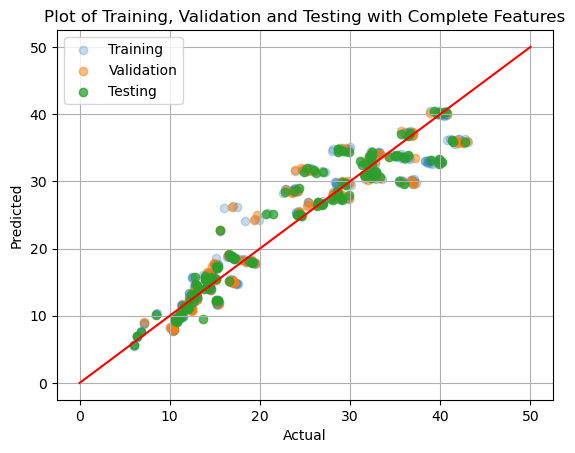

In [28]:
plot_pred_vs_actual(x_train, x_val, x_test, best_model, 'Complete Features')

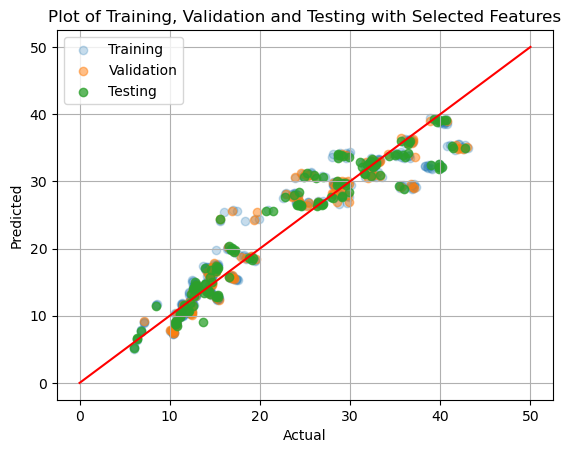

In [29]:
plot_pred_vs_actual(x_train_b, x_val_b, x_test_b, best_model_b, 'Selected Features')

### Insights

    1. During the ridge-regression training and validation process with 10 different alpha values, a noticeable drop in the R-squared value began when alpha reached a 3-digit value, which further decreased when alpha reached 1000.

    2. However, when alpha was set to zero, there was not much difference in the results. This suggests that regularization may not be significantly important, especially considering that the effects of the high-numerical value features, X2 (Surface Area) and X4 (Roof Area), were deemed insignificant during the identification of the top 5 features.

    3. In the context of usual regression, removing all features except the top 5 resulted in an expected decrease in the R-squared value. However, a high R-squared value of 0.918 was still achieved compared to the initial R-squared of 0.924 wherein all features were used. This emphasizes the explanatory power of the top features selected and the minimal effect of the removed features. Additionally, the Actual vs. Predicted graph of the test data shows minimal differences in the scatter plots, further supporting this conclusion.

## Problem 2: Classifying Breast Tumors


    Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image

### Dataset

#### Import

In [30]:
def import_csv_dataset(file_path):
    df = pd.read_csv(file_path, header=None)
    return df

In [31]:
wdbc_dataset = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\01 Regression\wdbc.data"
wdbc_df = import_csv_dataset(wdbc_dataset)

In [32]:
wdbc_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
# List of feature names starting from column 2 to column 31; obtained from source link
feature_names = [
    'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
    'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
    'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
    'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
    'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
    'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
    'symmetry3', 'fractal_dimension3'
]

# Create a dictionary mapping feature numbers to feature names
feature_dict = {f"Feature {i+1}": feature_names[i] for i in range(len(feature_names))}

In [34]:
feature_dict

{'Feature 1': 'radius1',
 'Feature 2': 'texture1',
 'Feature 3': 'perimeter1',
 'Feature 4': 'area1',
 'Feature 5': 'smoothness1',
 'Feature 6': 'compactness1',
 'Feature 7': 'concavity1',
 'Feature 8': 'concave_points1',
 'Feature 9': 'symmetry1',
 'Feature 10': 'fractal_dimension1',
 'Feature 11': 'radius2',
 'Feature 12': 'texture2',
 'Feature 13': 'perimeter2',
 'Feature 14': 'area2',
 'Feature 15': 'smoothness2',
 'Feature 16': 'compactness2',
 'Feature 17': 'concavity2',
 'Feature 18': 'concave_points2',
 'Feature 19': 'symmetry2',
 'Feature 20': 'fractal_dimension2',
 'Feature 21': 'radius3',
 'Feature 22': 'texture3',
 'Feature 23': 'perimeter3',
 'Feature 24': 'area3',
 'Feature 25': 'smoothness3',
 'Feature 26': 'compactness3',
 'Feature 27': 'concavity3',
 'Feature 28': 'concave_points3',
 'Feature 29': 'symmetry3',
 'Feature 30': 'fractal_dimension3'}

#### Exploratory Analysis

In [35]:
wdbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

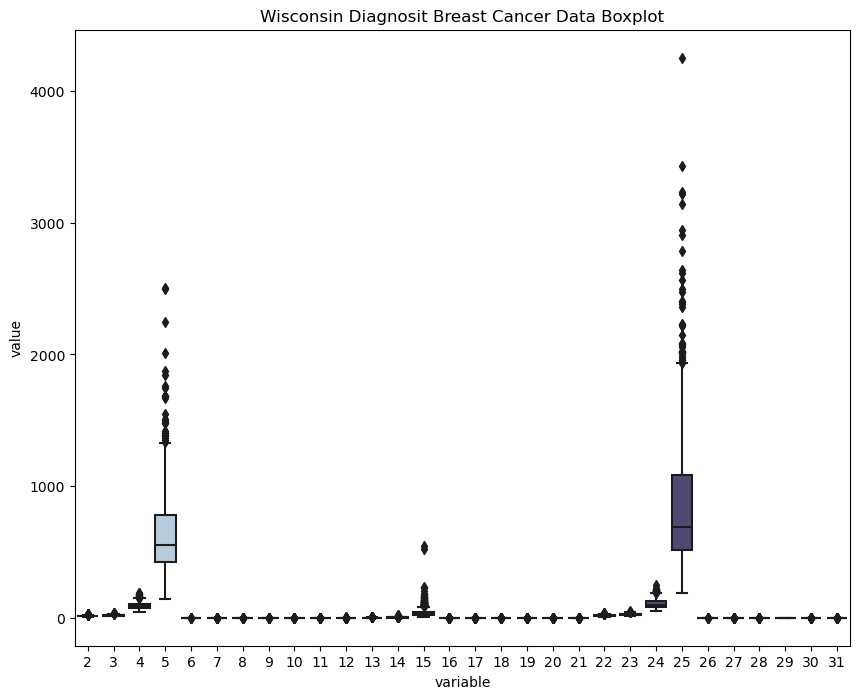

In [36]:
# Collect all features 
wdbc_df_melted = wdbc_df.drop(columns=[0,1]).melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x='variable', y='value', data=wdbc_df_melted, palette = 'ch:s=.25,rot=-.25')
plt.title('Wisconsin Diagnosit Breast Cancer Data Boxplot')
plt.show()

Text(0.5, 1.0, 'Missing values heatmap')

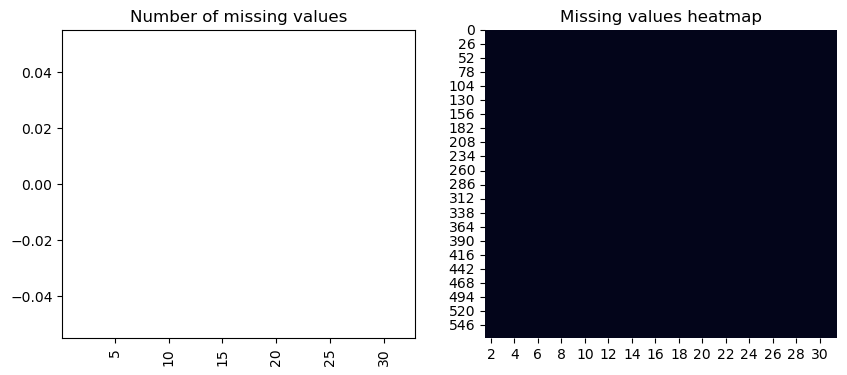

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(wdbc_df.drop(columns=[0,1]).columns.values, wdbc_df.drop(columns=[0,1]).isnull().sum())
plt.xticks(rotation=90)
plt.title("Number of missing values")
plt.subplot(122)
sns.heatmap(wdbc_df.drop(columns=[0,1]).isnull(), cbar = False).set_title("Missing values heatmap")
# sns.color_palette("ch:s=.25,rot=-.25")

    1. All features have complete data; no null values.
    2. High numerical values and few outliers could be seen on Feature 5 (smoothness1) and Feature 25 (smoothness3) possibly indicating the necessity of regularization of the features.

#### Data Preparation

In [38]:
# Get feature data
wdbc_feature_df = wdbc_df.drop(columns=[0,1])

In [39]:
# Get class data
wdbc_class_df = wdbc_df.iloc[:,1]

# Transform classes "M":1, "B":0
wdbc_class = wdbc_class_df.map({'M': 1, 'B': 0})

In [40]:
# Transform Data into numpy
x = wdbc_feature_df.to_numpy()
y = wdbc_class.to_numpy()

#### Data Partitioning

In [41]:
# Perform 70% Train-30% Validation-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9711, stratify=y)

### (a) Logistic Regression

#### Training and Validation

In [42]:
logistic_regression_model = make_pipeline(StandardScaler(),
    LogisticRegression()).fit(x_train,y_train)

In [43]:
print(f"\tTraining Accuracy: {logistic_regression_model.score(x, y)}")

	Training Accuracy: 0.9824253075571178


In [44]:
logistic_regression_model[1].coef_.shape

(1, 30)

In [45]:
# Dictionary for saving coefficient of best model
coefficients_dict = {}

for i, coef in enumerate(logistic_regression_model[1].coef_[0]):
    print(f"\t \tFeature {i+1}: {coef}")
    coefficients_dict[f"Feature {i+1}"] = coef

	 	Feature 1: 0.6427824050629657
	 	Feature 2: 0.36073961435854646
	 	Feature 3: 0.574738567681834
	 	Feature 4: 0.5955605016951816
	 	Feature 5: 0.33676541758094963
	 	Feature 6: -0.44701341083655305
	 	Feature 7: 0.7819833954142831
	 	Feature 8: 0.709262376750675
	 	Feature 9: -0.21987453551477526
	 	Feature 10: -0.5800650711393579
	 	Feature 11: 1.2110460247608923
	 	Feature 12: -0.1548256719086151
	 	Feature 13: 0.6537191407974909
	 	Feature 14: 0.8761785084977217
	 	Feature 15: 0.2447313110104919
	 	Feature 16: -0.5130611679912233
	 	Feature 17: 0.16804868267154208
	 	Feature 18: -0.07127177180205395
	 	Feature 19: -0.5926579753888158
	 	Feature 20: -0.5121735352970873
	 	Feature 21: 1.033713540535392
	 	Feature 22: 1.136860320187087
	 	Feature 23: 0.8236296498377172
	 	Feature 24: 0.880776941775255
	 	Feature 25: 1.1176655890186582
	 	Feature 26: 0.13586647664918103
	 	Feature 27: 0.7181447536149721
	 	Feature 28: 0.7564238747789258
	 	Feature 29: 0.8185696807234221
	 	Feature 30

#### Testing

In [46]:
test_accuracy = logistic_regression_model.score(x_test, y_test)
print("\tTest Accuracy:", test_accuracy)

	Test Accuracy: 0.9707602339181286


#### Identifcation of Relevant Features

In [47]:
# Sort the coefficients of features
sorted_coefficients = dict(sorted(coefficients_dict.items(), key=lambda x: x[1], reverse=True))

In [48]:
# Remove non-relevant features; for this case, features with negative coefficients
relevant_features = {key: value for key, value in sorted_coefficients.items() if value >= 0}

In [49]:
# Identify relevant features
for key in relevant_features:
    feature_name = key.ljust(12, ' ') + ": " +feature_dict[key].ljust(20, ' ')
    coefficient = str(relevant_features[key]).rjust(15, ' ')
    print(f"\t{feature_name}= {coefficient}")

	Feature 11  : radius2             = 1.2110460247608923
	Feature 22  : texture3            = 1.136860320187087
	Feature 25  : smoothness3         = 1.1176655890186582
	Feature 21  : radius3             = 1.033713540535392
	Feature 24  : area3               = 0.880776941775255
	Feature 14  : area2               = 0.8761785084977217
	Feature 23  : perimeter3          = 0.8236296498377172
	Feature 29  : symmetry3           = 0.8185696807234221
	Feature 7   : concavity1          = 0.7819833954142831
	Feature 28  : concave_points3     = 0.7564238747789258
	Feature 27  : concavity3          = 0.7181447536149721
	Feature 8   : concave_points1     = 0.709262376750675
	Feature 13  : perimeter2          = 0.6537191407974909
	Feature 1   : radius1             = 0.6427824050629657
	Feature 4   : area1               = 0.5955605016951816
	Feature 3   : perimeter1          = 0.574738567681834
	Feature 30  : fractal_dimension3  = 0.40306256332561174
	Feature 2   : texture1            = 0.3607396143585

### (b) Training Metrics

#### Confusion Matrix

In [50]:
def create_confusion_matrix(logistic_regression_model, x, y):
    y_prediction = logistic_regression_model.predict(x)
    conf_matrix = confusion_matrix(y, y_prediction)
    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Benign", "Malignant"])
    conf_matrix_display.plot(cmap='Blues_r')

    plt.title('Confusion Matrix')
    plt.show()

    return conf_matrix, y_prediction

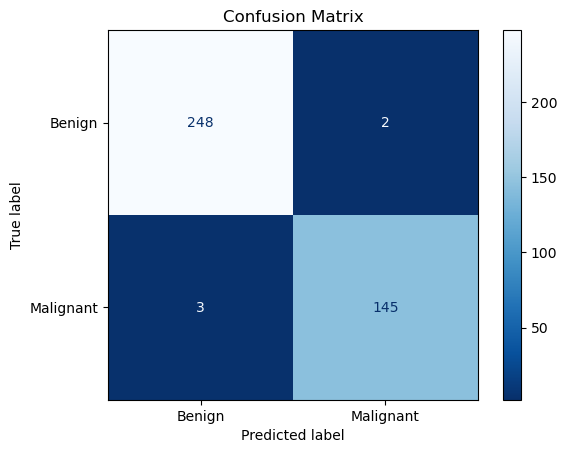

In [51]:
conf_matrix_train, y_prediction_train = create_confusion_matrix(logistic_regression_model, x_train, y_train)

#### Classification Report

In [52]:
def create_class_report(y, y_pred, conf_matrix):
    report = classification_report(y, y_pred, target_names=["Benign", "Malignant"])
    print(report)
    
    # TN = True Negative, FP = False Positive, FN = False Negative, TP = True Positive
    TN, FP, FN, TP = conf_matrix.ravel()

    FAR = FP / (FP + TN)
    print(f"False Alarm (Positive) Rate = {FAR*100:.2f}%")
    
    FNR = FN / (FN + TP)
#     print(f"False Negative Rate = {FNR*100:.2f}%")
    
    TPR = TP / (TP + FN)
#     print(f"True Positive Rate = {TPR*100:.2f}%")

In [53]:
create_class_report(y_train, y_prediction_train, conf_matrix_train)

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       250
   Malignant       0.99      0.98      0.98       148

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

False Alarm (Positive) Rate = 0.80%


#### ROC-AUC

In [54]:
def create_ROC_ACU(logistic_regression_model, x, y):
    # Get predicted probabilities for positive class
    y_probabilities = logistic_regression_model.predict_proba(x)[:, 1]

    # For ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_probabilities)

    # Plot ROC curve
    plt.plot(fpr,tpr,'b-o')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid()
    plt.show()
    
    roc_auc = roc_auc_score(y, y_probabilities)
    print(f"\tArea Under the Curve (AUC): {roc_auc}")

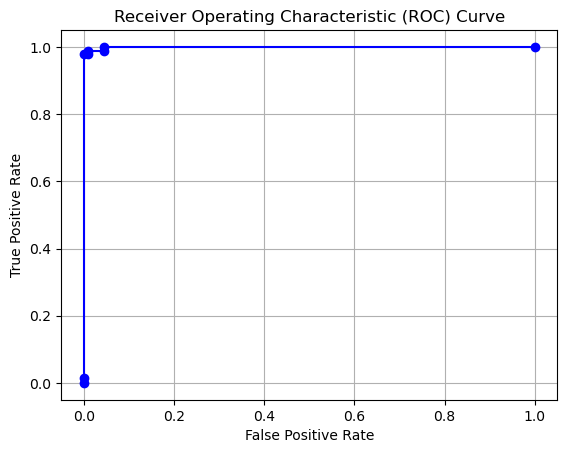

	Area Under the Curve (AUC): 0.9993513513513513


In [55]:
create_ROC_ACU(logistic_regression_model, x_train, y_train)

### (b) Test Metrics

#### Confusion Matrix

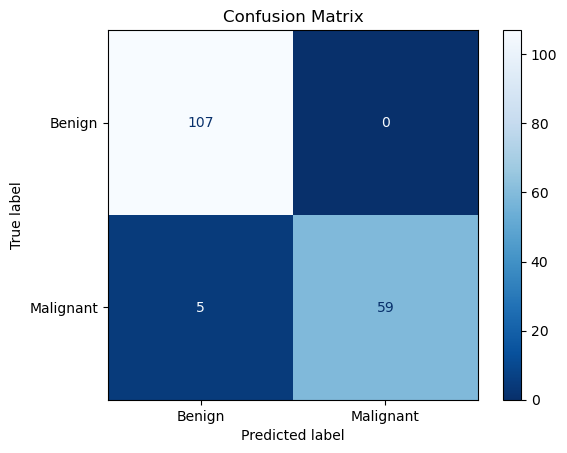

In [56]:
conf_matrix_test, y_prediction_test = create_confusion_matrix(logistic_regression_model, x_test, y_test)

#### Classification Report

In [57]:
create_class_report(y_test, y_prediction_test, conf_matrix_test)

              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       107
   Malignant       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

False Alarm (Positive) Rate = 0.00%


#### ROC-AUC

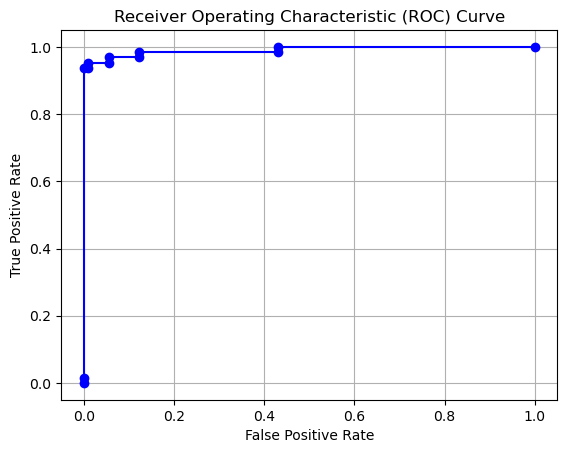

	Area Under the Curve (AUC): 0.9903621495327102


In [58]:
create_ROC_ACU(logistic_regression_model, x_test, y_test)

#### Insights

    1. The training results identified multiple relevant features, defined as those with a positive coefficient. The top features in consecutive order were Feature 11 (radius2), 22 (texture3), 25 (smoothness3), and 21 (radius3), all having a coefficient value greater than 1. However, as observed during data exploration, Features 5 and 25 were the only ones with high numerical values hence regularization of the data points may be unnecessary, especially considering that Feature 5 was deemed not significant. It is also recommended to conduct additional tests using these top-selected features to determine if a model for regression-classification could be obtained with a smaller number of features.

    2. Due to the high dimensionality of the data with 30 attributes, it was challenging to plot but results of the training and testing showed high classification accuracy of 98.24% and 97.08%, respectively indicating that the data are highly separable with the logistic-function line. The very small false alarm (false positive) rate of 0.80% for the training phase and 0.00% for the testing phase further demonstrate the logistic regression's effectiveness in classifying malignant and benign tumors. Nevertheless, it is crucial to note that in the field of medicine, false negatives are more concerning than false alarms. Missing malignant tumors could have serious consequences for patients. In this study, 3 individuals during the training phase and 5 individuals during the testing phase would not have discovered their benign breast tumors, potentially affecting their lives.
    
    3. Examining the metrics of the training and testing phases, high precision, recall, and F-1 score were achieved, confirming the classification strength of the model for this problem. This is further supported by the ROC curve, which nearly reached a value of 1 and was far from the diagonal line. Additionally, high values of AUC were obtained for the training and testing phases, with 0.999 and 0.990, respectively, providing further confidence in the classifier.